<a href="https://colab.research.google.com/github/KrishK1996/Lung-Cancer-Detection-using-Deep-Learning-Models/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Model 1***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 39s 252ms/step - accuracy: 0.4999 - loss: 1.0796 - val_accuracy: 0.4727 - val_loss: 0.9322
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.5269 - loss: 0.9302 - val_accuracy: 0.6727 - val_loss: 0.8558
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.5347 - loss: 0.9043 - val_accuracy: 0.6409 - val_loss: 0.8873
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.5617 - loss: 0.8989 - val_accuracy: 0.6682 - val_loss: 0.8316
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.5856 - loss: 0.8876 - val_accuracy: 0.4727 - val_loss: 0.9371
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.5381 - loss: 0.9170 - val_accuracy: 0.5545 - val_loss: 0.9008
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.5916 - loss: 0.8671 - val_accuracy: 0.4955 - val_loss: 0.9262
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6344 - loss: 0.8559
Test Accuracy: 66.82%


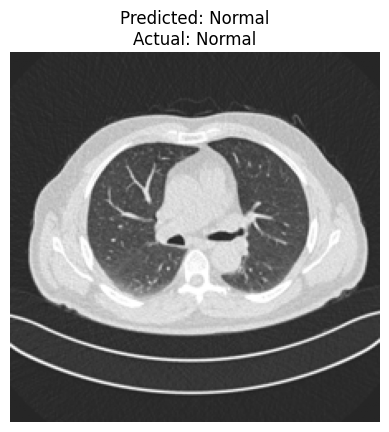

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


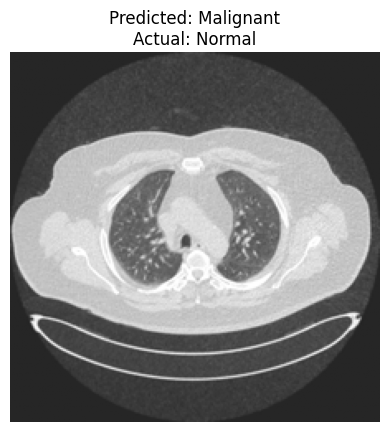

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


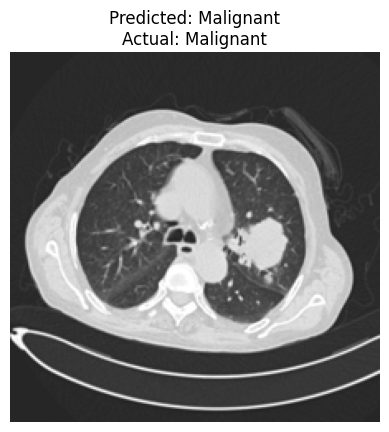

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


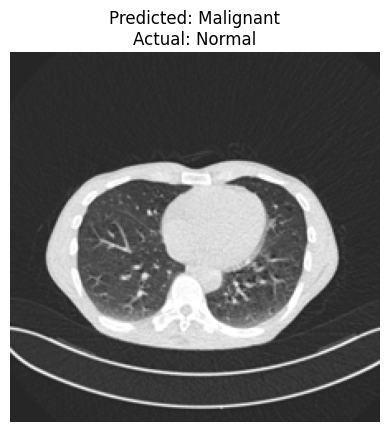

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


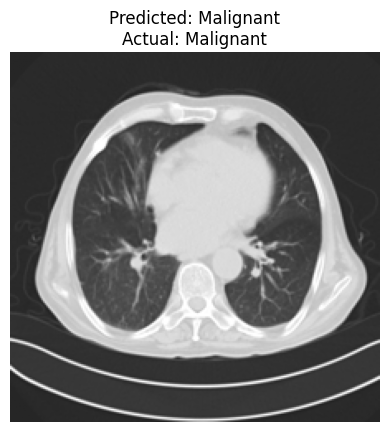

Error loading custom image: [Errno 2] No such file or directory: '/content/drive/MyDrive/Custom_Image/sample_1.png'


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# -----------------------------
# Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# -----------------------------
# Step 1: Set Dataset Path
# -----------------------------
data_dir = '/content/drive/MyDrive/LungCancer/LungCancer/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'  # Change this
# Step 2: Load & Preprocess Images
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB").resize((224, 224))
    return np.array(img) / 255.0

def create_dataset(data_dir):
    images, labels = [], []


    folder_to_label = {
        "Normal cases": "Normal",
        "Bengin cases": "Benign",
        "Malignant cases": "Malignant"
    }

    for folder_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, folder_name)
        if not os.path.isdir(class_dir):
            continue
        label = folder_to_label.get(folder_name)
        if label is None:
            continue
        for img_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, img_name)
            try:
                img = load_and_preprocess_image(image_path)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {image_path}: {e}")

    return np.array(images), np.array(labels)

# Load dataset
images, labels = create_dataset(data_dir)

# Encode string labels to numeric
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])

# -----------------------------
# Step 3: Split & Augment Data
# -----------------------------
x_train, x_test, y_train, y_test = train_test_split(
    images, numerical_labels, test_size=0.2, random_state=42, stratify=numerical_labels
)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# -----------------------------
# Step 4: Build CNN Model (Transfer Learning)
# -----------------------------
def create_cnn_model(num_classes):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet', include_top=False, input_shape=(224, 224, 3)
    )
    base_model.trainable = False
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs=base_model.input, outputs=output)

cnn_model = create_cnn_model(num_classes=len(label_mapping))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# Step 5: Train Model
# -----------------------------
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=8),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# -----------------------------
# Step 6: Evaluate Model
# -----------------------------
loss, acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# -----------------------------
# Step 7: Show Predictions
# -----------------------------
for i in range(5):
    img = x_test[i]
    true_label = y_test[i]
    pred = np.argmax(cnn_model.predict(np.expand_dims(img, axis=0)))

    plt.imshow(img)
    plt.title(
        f"Predicted: {list(label_mapping.keys())[list(label_mapping.values()).index(pred)]}\n"
        f"Actual: {list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]}"
    )
    plt.axis('off')
    plt.show()

# -----------------------------
# Step 8: Predict Custom Image
# -----------------------------
def predict_custom_image(image_path, model, label_mapping):
    try:
        img = load_and_preprocess_image(image_path)
        img_batch = np.expand_dims(img, axis=0)
        prediction = model.predict(img_batch)
        predicted_class_idx = np.argmax(prediction)
        predicted_class = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_class_idx)]

        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading custom image: {e}")


# Example usage:
predict_custom_image("/content/drive/MyDrive/Custom_Image/sample_1.png", cnn_model, label_mapping)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6344 - loss: 0.8559
Test Accuracy: 66.82%
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 520ms/step
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        24
   Malignant       0.69      0.87      0.77       113
      Normal       0.63      0.59      0.61        83

    accuracy                           0.67       220
   macro avg       0.44      0.49      0.46       220
weighted avg       0.59      0.67      0.62       220



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


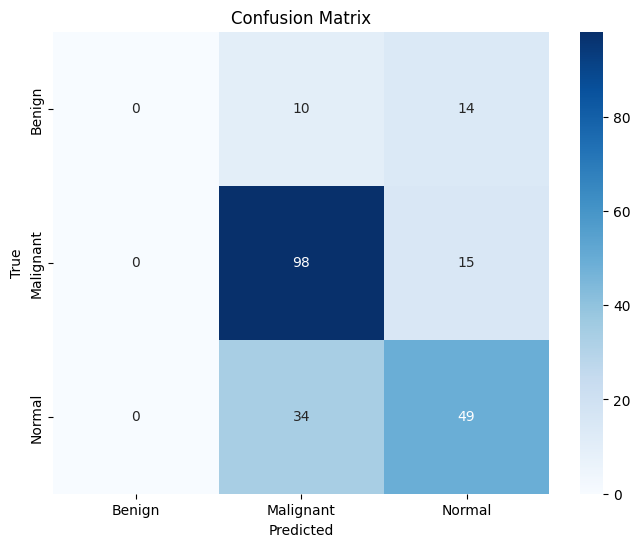

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# -----------------------------
# Step 6: Evaluate Model (Enhanced)
# -----------------------------
loss, acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Get predictions for the test set
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)


# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),
            yticklabels=list(label_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




# ***Model 2***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 31s 330ms/step - accuracy: 0.5741 - loss: 0.9897 - val_accuracy: 0.8682 - val_loss: 0.3951 - learning_rate: 0.0010
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 218ms/step - accuracy: 0.8309 - loss: 0.4805 - val_accuracy: 0.8818 - val_loss: 0.3251 - learning_rate: 0.0010
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.8299 - loss: 0.4575 - val_accuracy: 0.8636 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.8194 - loss: 0.4474
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.8197 - loss: 0.4471 - val_accuracy: 0.8455 - val_loss: 0.3795 - learning_rate: 0.0010
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.8444 - loss: 0.4007 - val_accuracy: 0.8682 - val_loss: 0.3186 - learning_rate: 3.0000e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.8738 - loss: 

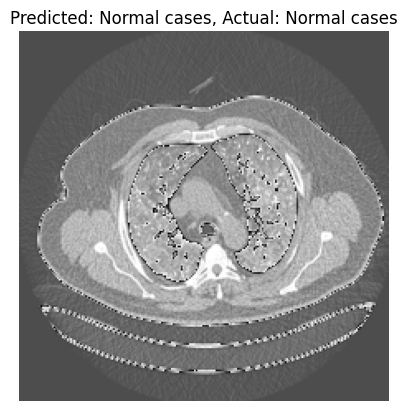

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


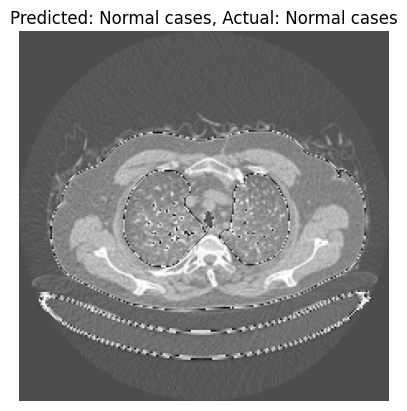

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


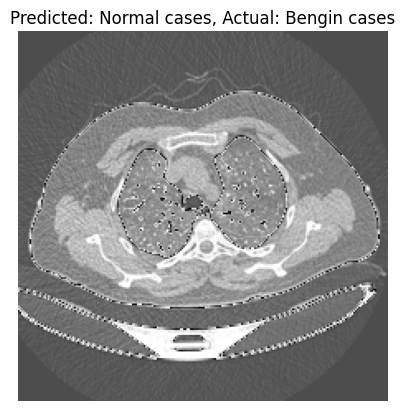

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


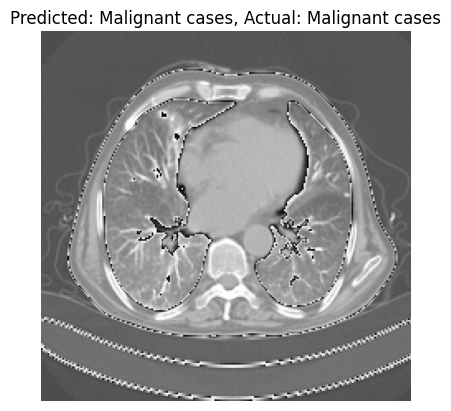

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


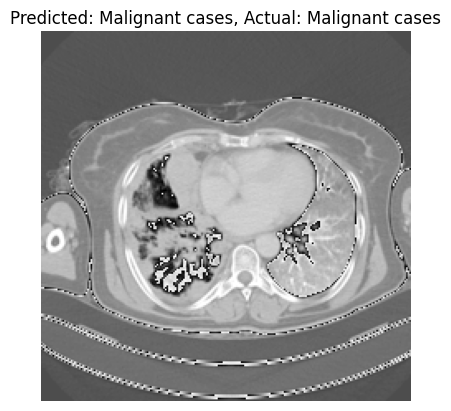

Error loading custom image: [Errno 2] No such file or directory: '/content/drive/MyDrive/Custom_Image/sample_1.png'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image

# ---- Step 1: Load and Preprocess ----
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB').resize((224, 224))
    return preprocess_input(np.array(img))

def create_dataset(data_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))
    for label_idx, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                fpath = os.path.join(class_path, fname)
                try:
                    img = load_and_preprocess_image(fpath)
                    images.append(img)
                    labels.append(label_idx)
                except Exception as e:
                    print(f"Error loading image: {fpath}, {e}")
    return np.array(images), np.array(labels), class_names

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ---- Dataset Path ----
dataset_path = '/content/drive/MyDrive/LungCancer/LungCancer/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'  # Directly editable
images, labels, class_names = create_dataset(dataset_path)

# Shuffle and split dataset
images, labels = shuffle(images, labels, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_gen = train_datagen.flow(x_train, y_train, batch_size=16)

# ---- Step 2: Create Hybrid Model ----
def create_hybrid_model(num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Reshape((1, x.shape[-1]))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    return model, base_model

model, base_model = create_hybrid_model(num_classes=len(class_names))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6, verbose=1)

# ---- Step 3: Train Initial Model ----
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_schedule]
)

# ---- Step 4: Fine-tune Base Model ----
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_schedule]
)

# ---- Step 5: Final Evaluation ----
loss, acc = model.evaluate(x_test, y_test)
print(f"\n✅ Final Accuracy after Fine-tuning: {acc * 100:.2f}%")

# ---- Step 6: Show Predictions ----
for i in range(5):
    idx = np.random.randint(0, len(x_test))
    img = x_test[idx]
    pred = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    # Convert for visualization if needed
    img_display = img
    if img_display.max() <= 1.0:
        img_display = (img_display * 255).astype(np.uint8)

    plt.imshow(img_display)
    plt.title(f"Predicted: {class_names[pred]}, Actual: {class_names[y_test[idx]]}")
    plt.axis('off')
    plt.show()

def predict_custom_image_hybrid(image_path, model, class_names):
    try:
        # Load and preprocess image using InceptionV3's preprocess_input
        img = Image.open(image_path).convert('RGB').resize((224, 224))
        img_array = preprocess_input(np.array(img))
        img_batch = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_batch)
        predicted_class_idx = np.argmax(prediction)
        predicted_class = class_names[predicted_class_idx]

        # Print result
        print(f"🧠 Predicted Class for '{os.path.basename(image_path)}': {predicted_class}")

        # Visualize result
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error loading custom image: {e}")

predict_custom_image_hybrid("/content/drive/MyDrive/Custom_Image/sample_1.png", model, class_names)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9089 - loss: 0.2642

✅ Final Accuracy after Fine-tuning: 88.64%
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        19
      Benign       0.98      0.97      0.97       123
   Malignant       0.78      0.97      0.86        78

    accuracy                           0.89       220
   macro avg       0.58      0.65      0.61       220
weighted avg       0.82      0.89      0.85       220



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


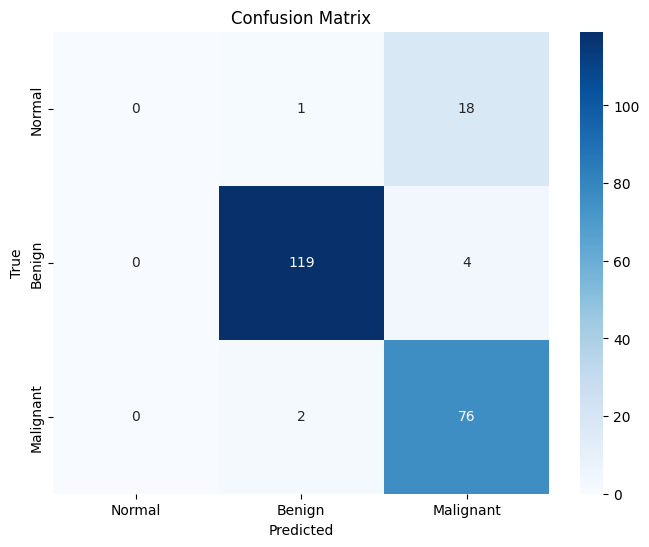

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
import seaborn as sns

# ---- Step 5: Final Evaluation ----
loss, acc = model.evaluate(x_test, y_test)
print(f"\n✅ Final Accuracy after Fine-tuning: {acc * 100:.2f}%")

# ---- Step 6: Evaluate Model (Enhanced) ----
y_pred = np.argmax(model.predict(x_test), axis=1)

class_names = ['Normal', 'Benign', 'Malignant'] # Or any other way to get the correct list of class names


# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ... (Rest of your code) ...


# ***Model 3***

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 638ms/step - accuracy: 0.6121 - loss: 1.0628 - val_accuracy: 0.7500 - val_loss: 0.5393
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8937 - loss: 0.3798 - val_accuracy: 0.7273 - val_loss: 0.4757
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.8124 - loss: 0.4171 - val_accuracy: 0.8182 - val_loss: 0.4636
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9142 - loss: 0.2525 - val_accuracy: 0.8409 - val_loss: 0.4355
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.9194 - loss: 0.1938 - val_accuracy: 0.8409 - val_loss: 0.3995
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8772 - loss: 0.2783 - val_accuracy: 0.8182 - val_loss: 0.3753
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9649 - loss: 0.1289 - val_accuracy: 0.7045 - val_loss: 0.4797
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9196 - loss: 0.1973 - val_accuracy: 0.8409

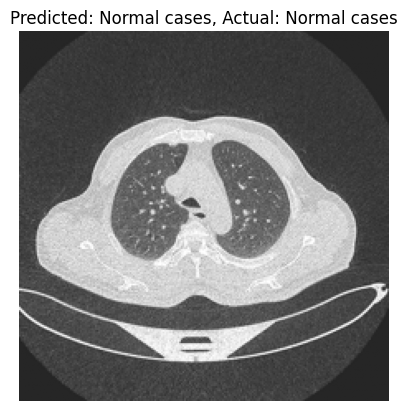

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


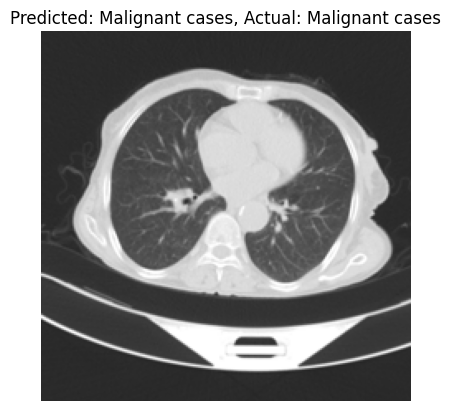

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


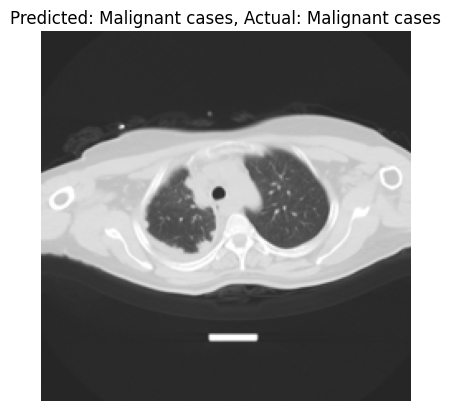

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


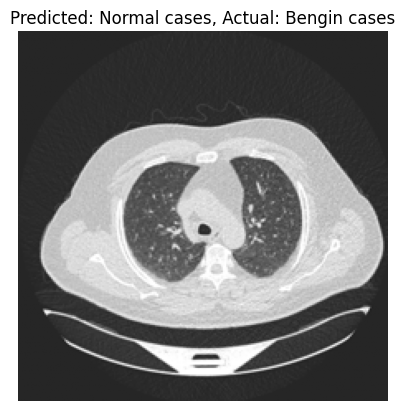

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


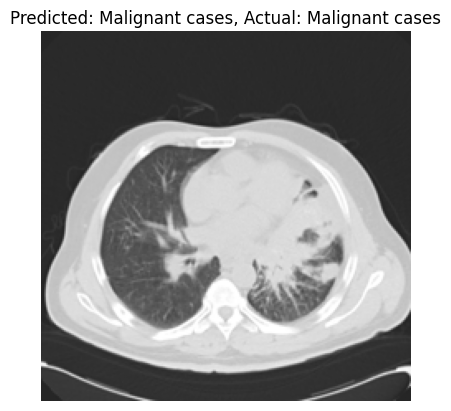

In [ ]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


data_dir = '/content/drive/MyDrive/LungCancer/LungCancer/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'

# Load and preprocess images
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224)).convert("RGB")
    img_array = np.array(img) / 255.0
    return img_array

def create_dataset(data_dir):
    images, labels = [], []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    img = load_and_preprocess_image(image_path)
                    images.append(img)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading {image_path}: {e}")
    return np.array(images), np.array(labels)

# Load dataset
images, labels = create_dataset(data_dir)
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# MODEL 3 - MobileNetV2
random.seed(42)
random.seed(42)
indices_model2 = random.sample(range(len(images)), k=int(0.8 * len(images)))  # 80% for Model 2

# Ensure no overlap with model 2 indices
used_indices = set(indices_model2)
available_indices = list(set(range(len(images))) - used_indices)
indices_model3 = random.sample(available_indices, k=min(int(0.8 * len(images)), len(available_indices)))

images_model3 = images[indices_model3]
labels_model3 = numerical_labels[indices_model3]

x_train_m3, x_test_m3, y_train_m3, y_test_m3 = train_test_split(images_model3, labels_model3, test_size=0.2, random_state=42)

# Define MobileNetV2 model
def create_mobilenet_model():
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(len(label_mapping), activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
    return model

# Train Model
mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_m3 = mobilenet_model.fit(datagen.flow(x_train_m3, y_train_m3, batch_size=8), epochs=10, validation_data=(x_test_m3, y_test_m3))

# Evaluate
_, accuracy_m3 = mobilenet_model.evaluate(x_test_m3, y_test_m3)
print("Model 3 Accuracy: {:.2f}%".format(accuracy_m3 * 100))

# Show predictions
for i in range(5):
    prediction = mobilenet_model.predict(np.expand_dims(x_test_m3[i], axis=0))
    predicted_class = np.argmax(prediction)
    actual_class = y_test_m3[i]
    plt.imshow(x_test_m3[i])
    plt.title(f"Predicted: {list(label_mapping.keys())[predicted_class]}, Actual: {list(label_mapping.keys())[actual_class]}")
    plt.axis('off')
    plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
                 precision    recall  f1-score   support

   Bengin cases       0.42      0.71      0.53         7
Malignant cases       1.00      1.00      1.00        23
   Normal cases       0.78      0.50      0.61        14

       accuracy                           0.80        44
      macro avg       0.73      0.74      0.71        44
   weighted avg       0.84      0.80      0.80        44



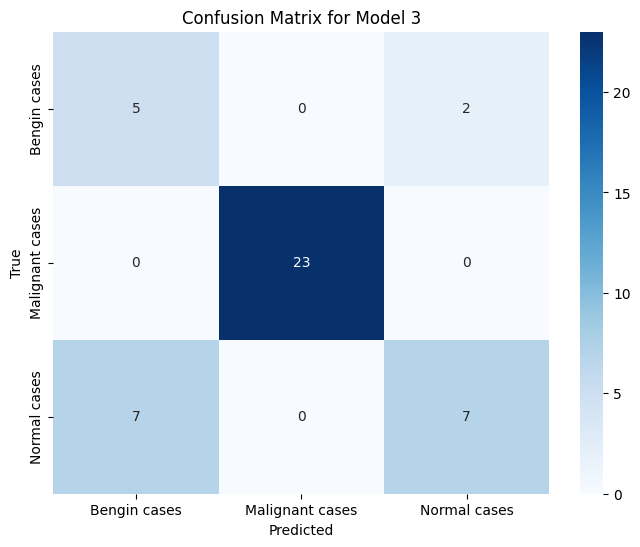

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix # Import classification_report and confusion_matrix
import seaborn as sns

# ---- Step 6: Evaluate Model (Enhanced) ----
y_pred_m3 = np.argmax(mobilenet_model.predict(x_test_m3), axis=1)

# Generate and print the classification report
print(classification_report(y_test_m3, y_pred_m3, target_names=list(label_mapping.keys())))

# Generate and plot the confusion matrix
cm_m3 = confusion_matrix(y_test_m3, y_pred_m3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_m3, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),
            yticklabels=list(label_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Model 3')
plt.show()




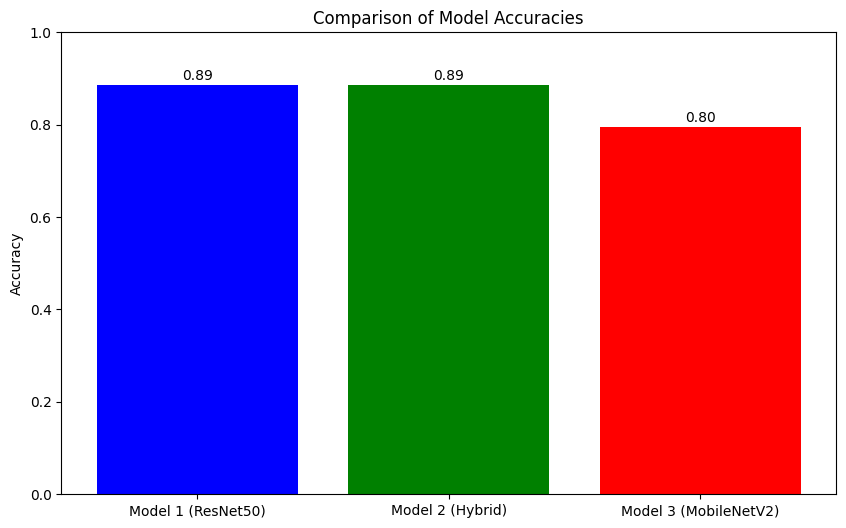

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


model_names = ['Model 1 (ResNet50)', 'Model 2 (Hybrid)', 'Model 3 (MobileNetV2)']
accuracies = [acc, model.evaluate(x_test, y_test, verbose=0)[1], accuracy_m3] # Re-evaluate Model 2 to get its accuracy

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) # Assuming accuracy is between 0 and 1

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd


# Model 1 metrics (ResNet50)
report_m1 = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant', 'Normal'], output_dict=True)
df_m1 = pd.DataFrame(report_m1).transpose()

# Model 2 metrics (Hybrid)
report_m2 = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
df_m2 = pd.DataFrame(report_m2).transpose()


# Model 3 metrics (MobileNetV2)
report_m3 = classification_report(y_test_m3, y_pred_m3, target_names=list(label_mapping.keys()), output_dict=True)
df_m3 = pd.DataFrame(report_m3).transpose()

# Extract overall metrics
metrics_m1 = df_m1.loc[['accuracy', 'macro avg'], ['precision', 'recall', 'f1-score', 'support']].iloc[0:1].copy()
metrics_m1['accuracy'] = df_m1.loc['accuracy', 'f1-score'] # Accuracy is in the f1-score column when output_dict=True

metrics_m2 = df_m2.loc[['accuracy', 'macro avg'], ['precision', 'recall', 'f1-score', 'support']].iloc[0:1].copy()
metrics_m2['accuracy'] = df_m2.loc['accuracy', 'f1-score']

metrics_m3 = df_m3.loc[['accuracy', 'macro avg'], ['precision', 'recall', 'f1-score', 'support']].iloc[0:1].copy()
metrics_m3['accuracy'] = df_m3.loc['accuracy', 'f1-score']


# Combine metrics into a single DataFrame
metrics_df = pd.DataFrame({
    'Model 1 (ResNet50)': metrics_m1.iloc[0],
    'Model 2 (Hybrid)': metrics_m2.iloc[0],
    'Model 3 (MobileNetV2)': metrics_m3.iloc[0]
}).T[['accuracy', 'precision', 'recall', 'f1-score']] # Reorder columns


display(metrics_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,accuracy,precision,recall,f1-score
Model 1 (ResNet50),0.886364,0.886364,0.886364,0.886364
Model 2 (Hybrid),0.886364,0.886364,0.886364,0.886364
Model 3 (MobileNetV2),0.795455,0.795455,0.795455,0.795455


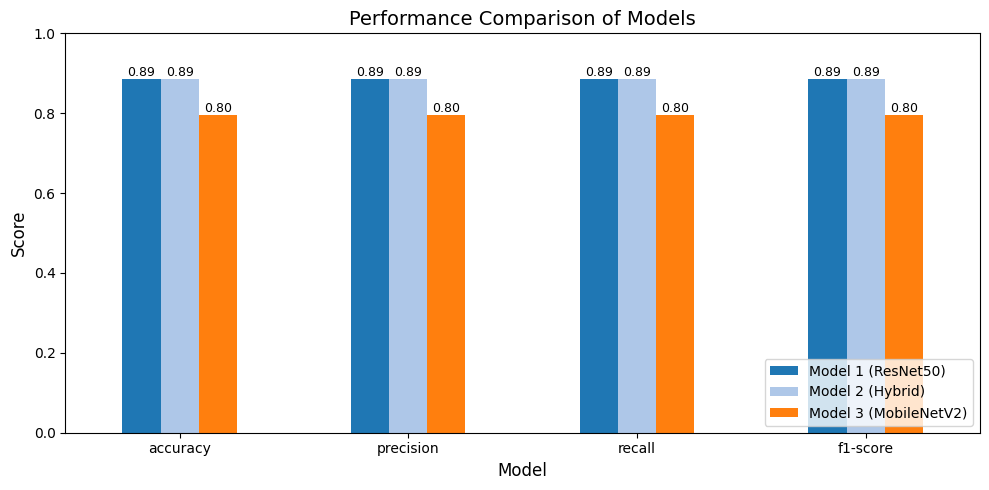

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Transpose the dataframe for plotting
metrics_df_transposed = metrics_df.T

# Define colors (blue/grey tones)
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']

# Plotting the metrics with specified style
metrics_df_transposed.plot(kind='bar', figsize=(10, 5), color=colors)

plt.title('Performance Comparison of Models', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='lower right', fontsize=10)
plt.ylim(0, 1.0) # Set y-axis limit as requested

# Add value labels on top of the bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()